In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import scipy.io
df = scipy.io.loadmat('ex3data1.mat')
print(type(df))

<class 'dict'>


In [3]:
df['X'].shape  #5000 train eg. 20*20 greyscale image

(5000, 400)

In [4]:
df['y'].shape

(5000, 1)

In [5]:
set(df['y'].flatten()) #label 1 to 10

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [6]:
x = df['X']
y = df['y']
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,
                                                stratify = y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 400)
(1000, 400)
(4000, 1)
(1000, 1)


## Non Regularized LR

In [8]:
from sklearn.linear_model import LogisticRegression

lr_non_reg = LogisticRegression(penalty='none')

In [9]:
lr_non_reg.fit(x_train,y_train)

LogisticRegression(penalty='none')

In [10]:
train_acc = lr_non_reg.score(x_train,y_train)
test_acc = lr_non_reg.score(x_test,y_test)

print(f"Accuracy on Training Set ==> {train_acc}")
print(f"Accuracy on Testing Set  ==> {test_acc}")

Accuracy on Training Set ==> 0.99975
Accuracy on Testing Set  ==> 0.887


## Regularized LR

In [11]:
lr_reg = LogisticRegression(penalty='l2',C = 0.07)

In [12]:
lr_reg.fit(x_train,y_train)

LogisticRegression(C=0.07)

In [13]:
train_acc = lr_reg.score(x_train,y_train)
test_acc = lr_reg.score(x_test,y_test)

print(f"Accuracy on Training Set ==> {train_acc}")
print(f"Accuracy on Testing Set  ==> {test_acc}")

Accuracy on Training Set ==> 0.92475
Accuracy on Testing Set  ==> 0.899


## Simple Neural Network

In [20]:
import tensorflow as tf

#Create the model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(400,activation = 'relu'),
    #to use regularization, put param: kernel_regularizer=tf.keras.regularizers.L2(0.001)
    tf.keras.layers.Dense(25,activation = 'relu'),
    tf.keras.layers.Dense(11,activation = 'softmax')
    
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(lr = 0.01),
                metrics=['accuracy'])

In [21]:
# Fit the model
model.fit(x_train,y_train,
           validation_data=(x_test,y_test),
          epochs=50,verbose = 0)

Enter Some Index: 5
Predicted Class is: 4
Plotting Actual Image...


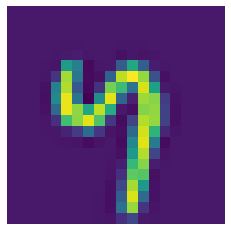

In [24]:
some_idx = int(input("Enter Some Index: "))
idx = model.predict(x_train[some_idx].reshape(-1,1).T)[0].argmax()
classes = list(set(df['y'].flatten()))
print("Predicted Class is:",classes[idx+1])

print("Plotting Actual Image...")
plt.imshow(x_train[some_idx].reshape(20,20))
plt.axis('off');